In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [11]:
cal=pd.read_csv('calories.csv')
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exer=pd.read_csv('exercise.csv')
exer.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
exer.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [7]:
exer.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [8]:
exer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [24]:
#concatenating
new_dataset=pd.concat([exer,cal['Calories']],axis=1)
new_dataset

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


<Axes: xlabel='count', ylabel='Gender'>

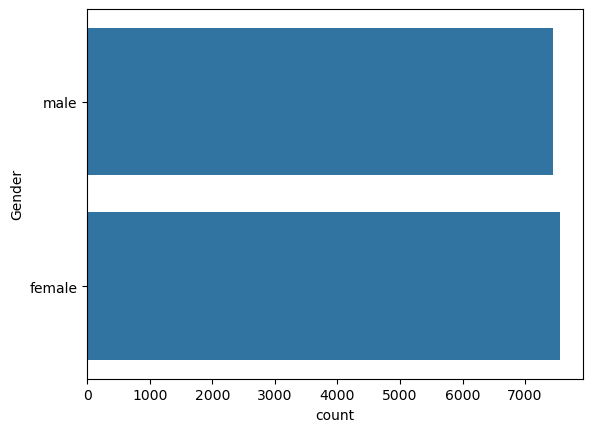

In [20]:
import seaborn as sns
sns.countplot(new_dataset['Gender'])

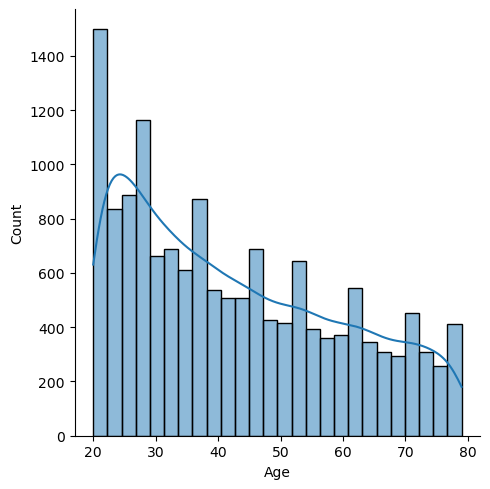

In [23]:
sns.displot(new_dataset['Age'],kde=True)

In [38]:
#Label encoding for Gender
encoder=LabelEncoder()
new_dataset['Gender']=encoder.fit_transform(new_dataset['Gender'])

In [39]:
print(new_dataset.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       1   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       0   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       1   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       0   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       0   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [40]:
#separating dependent and independent features
x=new_dataset.drop(columns={'User_ID','Calories'},axis=1)
y=new_dataset['Calories']

In [41]:
print(x)
print(y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [42]:
#Training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape,x_test.shape)

(12000, 7) (3000, 7)


In [43]:
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [52]:
#predicting the model
y_predict=model.predict(x_train)
score=mean_absolute_error(y_predict,y_train)
print(score)

0.9322033420062313


In [53]:
print(y_predict)

[ 11.680271  36.71814   31.747328 ... 108.05978  179.23735   44.236874]


In [55]:
input=(1,68,190.0,94.0,29.0,105.0,40.8)
input_as_numpy=np.asarray(input)
input_reshape=input_as_numpy.reshape(1,-1)
predict_output=model.predict(input_reshape)
print(predict_output)

[236.13371]
